In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
sns.set()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 

## 导入归一化的数据

In [2]:
df = pd.read_csv("./datasets/car_2.0.csv", encoding="utf-8")
df = df.drop(["全款"], axis=1)

## 计算每个特征与预测值的相似度

In [3]:
df_corr = df.corr()
df_corr.head()

,新车价,保值率,表显里程,排量,登记证为准,轴距,最大马力,最大扭矩,主/副驾驶安全气囊,前/后排侧气囊,...,猎豹汽车,双龙汽车,比速汽车,捷豹,长安标致雪铁龙,保时捷,宝沃汽车,北汽昌河,欧宝,林肯
新车价,1.000000,-0.034624,0.178490,0.657543,0.185440,0.586773,0.789877,0.782901,0.099234,0.554575,...,-0.015368,0.002392,-0.021195,0.068508,0.006184,0.070021,0.004270,-0.023265,0.018655,0.022587
保值率,-0.034624,1.000000,-0.569242,-0.130738,-0.127967,0.090912,0.044377,0.097850,-0.087733,0.000404,...,-0.005460,-0.036814,0.002042,-0.029097,-0.010912,0.008202,0.045221,0.012093,-0.025228,0.029079
表显里程,0.178490,-0.569242,1.000000,0.295704,0.194921,0.077683,0.091633,0.045267,0.030015,0.118789,...,-0.001578,0.010805,-0.033885,-0.007666,0.005617,0.014679,-0.040319,-0.012301,0.017101,-0.037828
排量,0.657543,-0.130738,0.295704,1.000000,0.199579,0.509386,0.686397,0.553226,0.002476,0.357449,...,0.016023,0.016023,-0.028878,0.016023,-0.009635,0.016023,0.016023,-0.016049,0.041681,0.016023
登记证为准,0.185440,-0.127967,0.194921,0.199579,1.000000,0.079345,0.153236,0.137974,-0.017483,0.114260,...,0.003866,0.003866,-0.019054,-0.019054,0.003866,0.003866,-0.019054,-0.019054,-0.019054,0.003866


## 相似度排序，选出前20个

In [4]:
df_corr_abs = df_corr.abs()
df_corr_abs.sort_values("保值率",inplace=True, ascending=False)
selected_features_1 = df_corr_abs.index.values[1:21]
feature_corrs = []
for f in selected_features_1:
    feature_corrs.append(df_corr["保值率"][f])

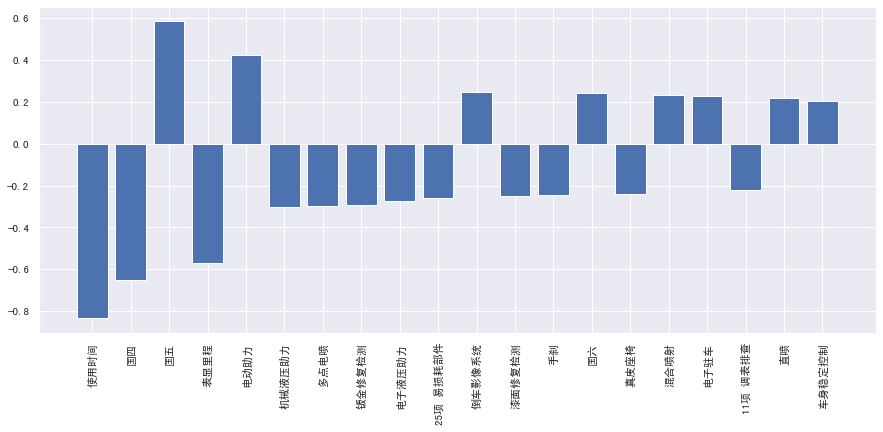

In [5]:
plt.figure(figsize=(15, 6))
plt.bar(selected_features_1, feature_corrs)
plt.xticks(rotation=90)
plt.savefig("./images/correlation.png", dpi=300)
plt.show()

## 计算每个特征的重要性，选出最重要的20个 

In [6]:
Y = df.loc[:]["保值率"]
df = df.drop(["保值率"], axis=1)
X = df.iloc[:, :]

selected_features_2 = []
feature_importances = []
rf = RandomForestRegressor()  
rf = rf.fit(X,Y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = df.columns.values

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))
    if f < 20:
        selected_features_2.append(names[indices[f]])
        feature_importances.append(importances[indices[f]])

Feature ranking:
1. 使用时间 (0.715569)
2. 广汽本田 (0.036295)
3. 东风本田 (0.017911)
4. 宽 (0.016041)
5. 高 (0.014503)
6. 广汽丰田 (0.012372)
7. 轴距 (0.010693)
8. 表显里程 (0.009894)
9. 排量 (0.009648)
10. 一汽丰田 (0.009568)
11. 最大马力 (0.009248)
12. 新车价 (0.009039)
13. 长 (0.008528)
14. 插电式混合动力 (0.005930)
15. 北京奔驰 (0.005541)
16. 电动助力 (0.005190)
17. 年检 (0.004821)
18. 33项 外部配置 (0.004340)
19. 缺陷项检测 (0.004323)
20. 漆面修复检测 (0.004286)
21. 东风日产 (0.003999)
22. 钣金修复检测 (0.003698)
23. 最大扭矩 (0.003451)
24. 中大型SUV (0.003387)
25. 登记证为准 (0.002721)
26. 交强险 (0.002549)
27. 东风标致 (0.002378)
28. 22项 轻微碰撞 (0.002310)
29. GPS导航 (0.002295)
30. 25项 易损耗部件 (0.002240)
31. 上汽通用别克 (0.001968)
32. 紧凑型车 (0.001954)
33. 手刹 (0.001912)
34. 混合喷射 (0.001783)
35. 一汽-大众 (0.001771)
36. 脚刹 (0.001705)
37. 电子液压助力 (0.001590)
38. 前置后驱 (0.001509)
39. 一汽马自达 (0.001433)
40. 国六 (0.001312)
41. 11项 调表排查 (0.001264)
42. 42项 内部配置 (0.001238)
43. 上汽斯柯达 (0.001182)
44. 倒车影像系统 (0.001144)
45. 真皮座椅 (0.001078)
46. 长安马自达 (0.001065)
47. 倒车雷达 (0.001012)
48. 无钥匙启动 (0.000946)
49. 电子驻车 (0

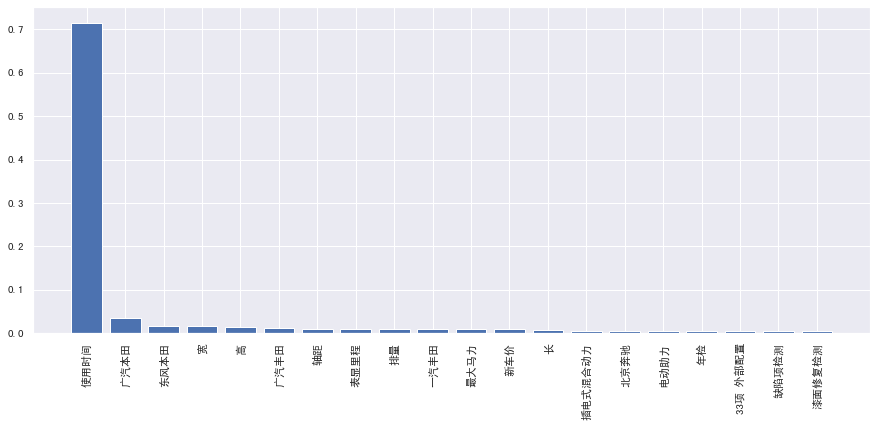

In [7]:
plt.figure(figsize=(15, 6))
plt.bar(selected_features_2, feature_importances)
plt.xticks(rotation=90)
plt.savefig("./images/importance.png", dpi=300)
plt.show()

## 两组，2 * 20 个特征，取并集 

In [8]:
all_features = df.columns.values
print(len(all_features))
selected_features = list(set(selected_features_1).union(set(selected_features_2)))
print(len(selected_features))
drop_list = list(set(all_features).difference(set(selected_features)))
print(len(drop_list))

197
36
161


In [9]:
df = df.drop(drop_list, axis=1)
df.head()

,新车价,表显里程,排量,轴距,最大马力,车身稳定控制,倒车影像系统,真皮座椅,11项 调表排查,25项 易损耗部件,...,手刹,电子驻车,长,宽,高,广汽本田,北京奔驰,东风本田,广汽丰田,一汽丰田
0,0.149762,0.438508,0.219512,0.817201,0.295082,1.0,1.000000e-08,1.000000e+00,1.670000e-09,1.250000e-09,...,1.000000e-08,1.0,0.804067,0.593952,0.185946,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08
1,0.227645,0.625504,0.512195,0.817201,0.590164,1.0,1.000000e+00,1.000000e+00,1.670000e-09,1.250000e-09,...,1.000000e-08,1.0,0.804067,0.593952,0.185946,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08
2,0.141265,0.834677,0.121951,0.817201,0.200000,1.0,1.000000e-08,1.000000e+00,3.333333e-01,2.500000e-01,...,1.000000e-08,1.0,0.804067,0.593952,0.185946,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08
3,0.301395,0.172883,0.268293,0.786880,0.462295,1.0,1.000000e+00,1.000000e-08,1.670000e-09,1.250000e-09,...,1.000000e-08,1.0,0.649538,0.529158,0.185946,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08
4,0.192095,0.503024,0.219512,0.790671,0.295082,1.0,1.000000e+00,1.000000e+00,1.666667e-01,2.500000e-01,...,1.000000e-08,1.0,0.782625,0.639309,0.126486,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08


## 计算每两个特征的相关系数

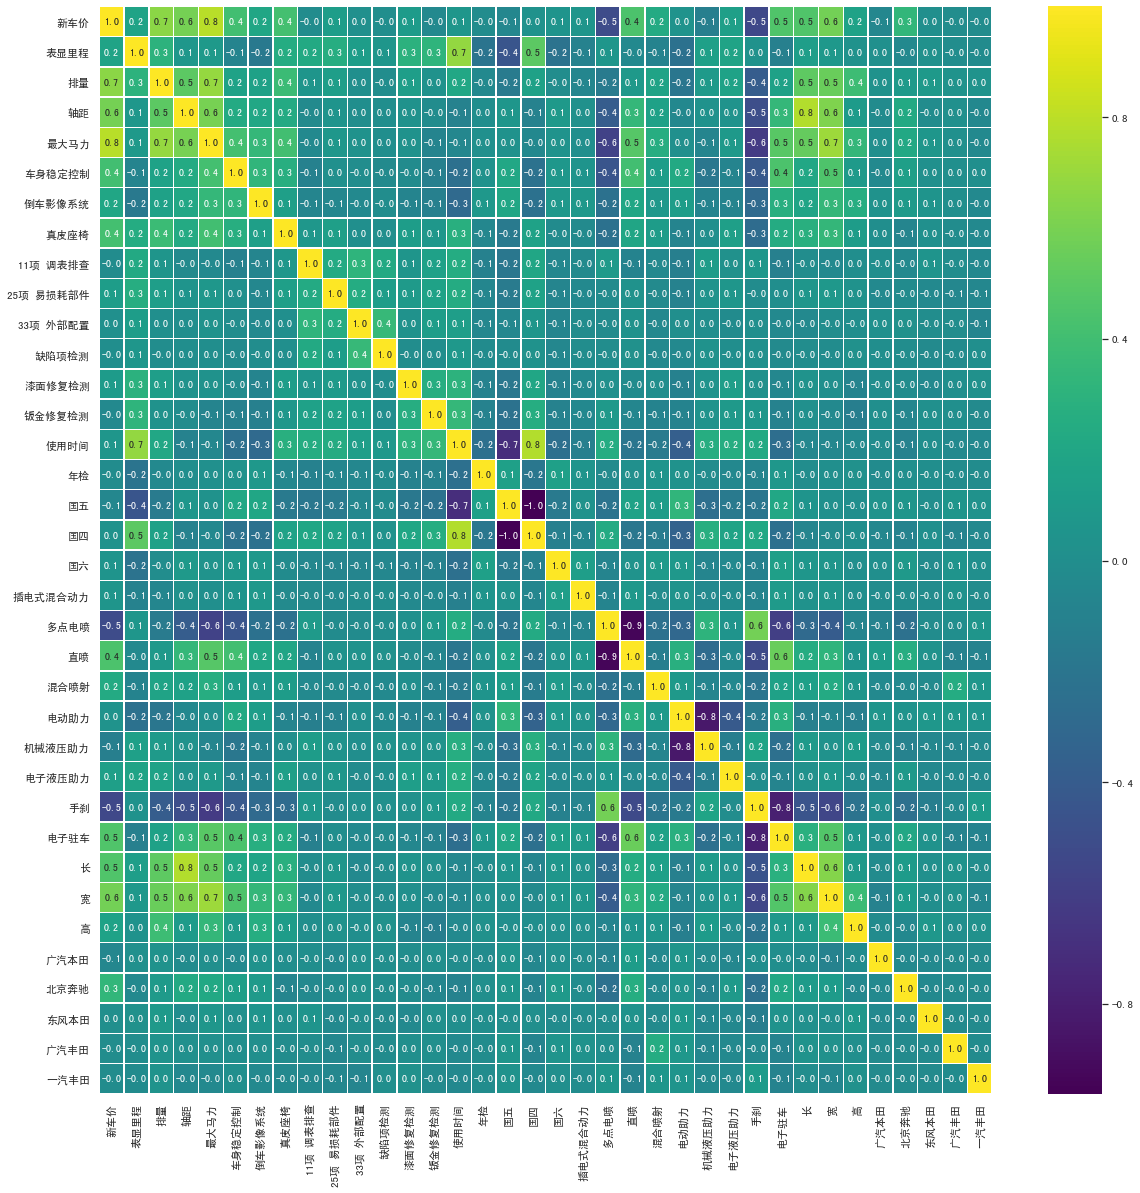

In [19]:
f,ax = plt.subplots(figsize=(20, 20))
fig = sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', cmap="viridis").get_figure()
fig.savefig('./images/correlation_between.png', dpi=300) 

## 相似度高于阈值的特征，只保留其一 

In [13]:
threshold = 0.8
df_corr = df.corr()
df_corr_abs = df_corr.abs()
similar_feature = []
for f1 in selected_features:
    for f2 in selected_features:
        if selected_features.index(f2) < selected_features.index(f1):
            if df_corr_abs[f1][f2] >= threshold:
                similar_feature.append([f1,f2,df_corr[f1][f2]])

In [14]:
similar_feature

[['多点电喷', '直喷', -0.9318450865102195],
 ['国五', '国四', -0.961443281575026],
 ['机械液压助力', '电动助力', -0.8372082717246742]]

In [15]:
features_to_drop = [f[0] for f in similar_feature]
selected_features = [f for f in selected_features if f not in features_to_drop]
len(selected_features)

33

In [16]:
pre_selected_features = [
    '机械液压助力','手刹','直喷','北京奔驰','倒车影像系统','表显里程','高','广汽丰田',
    '漆面修复检测','25项 易损耗部件','国五','广汽本田','国六','一汽丰田','宽','长','插电式混合动力',
    '东风日产','新车价','最大扭矩','年检','真皮座椅','排量','使用时间','11项 调表排查','电子驻车',
    '电子液压助力','混合喷射','轴距','钣金修复检测','东风本田','车身稳定控制'
]
droped_features = [f[0] for f in similar_feature] + [f[1] for f in similar_feature] 
for i in selected_features:
    if not i in pre_selected_features:
        if not i in droped_features:
            print(i)
# 归一化与不归一化的差别：

最大马力
缺陷项检测
33项 外部配置
